<img src="header.png" align="left"/>

# Anwendungsbeispiel Cleaning and transformation of data

Das Ziel dieses Beispieles ist es einige Aufgaben der Reinigung und Transformation von Daten zu erklären und den Effekt zu testen.


Konkret werden wir folgende Punkte durchgehen:

- Reiningen von unbenötigten Samples und Features
- Füllen von ungültigen und leeren Werten
- Reinigen von Textfeldern
- Entfernen von Duplikaten
- Prüfen von Wertebereichen
- Umwandeln von Datumswerten
- Resampling und accumulation
- Transformationen von Features und Labels




Die Beispiele wurden aus folgenden Quellen entnommen:

- [1] [https://www.import.io/post/what-is-data-cleansing-and-transformation-wrangling/](https://www.import.io/post/what-is-data-cleansing-and-transformation-wrangling/) 
- [2] [https://realpython.com/python-data-cleaning-numpy-pandas/](https://realpython.com/python-data-cleaning-numpy-pandas/)


Die Daten wurden entnommen von:

- [https://finance.yahoo.com/quote/%5EDJI/history/](https://finance.yahoo.com/quote/%5EDJI/history/)
- [https://fred.stlouisfed.org/series/MCOILBRENTEU](https://fred.stlouisfed.org/series/MCOILBRENTEU)
- [http://www.sca.isr.umich.edu/](http://www.sca.isr.umich.edu/)


# Motivation

Eine gute Übersicht zum Thema liefert dieser Artikel: [https://cleverdata.io/clean-select-transform-data/](https://cleverdata.io/clean-select-transform-data/)

<img src="info.png" align="left"/> 

# Importe

In [1]:
#
# modules
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from datetime import datetime
from functools import reduce
import datetime


#
# Einstellen der Grösse von Diagrammen
#
plt.rcParams['figure.figsize'] = [16, 9]

# Beispiel Datensatz mit Zahlen und Texten

## Laden von Daten

In [2]:
df = pd.read_csv('data/BL-Flickr-Images-Book.csv')

In [3]:
df.head()

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.


## Entfernen von nicht notwendigen Features

In [4]:
to_drop = ['Edition Statement','Corporate Author','Corporate Contributors','Former owner','Engraver','Contributors','Issuance type','Shelfmarks']

In [5]:
df.drop(to_drop, inplace=True, axis=1)

In [6]:
df.head()

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
1,216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
3,472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


## Festlegen eines Index zum Zugriff auf die Daten

In [7]:
#
# Prüfen ob Identifier ein geeigneter Index ist
#
df['Identifier'].is_unique

True

In [8]:
df = df.set_index('Identifier')

In [9]:
df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


In [10]:
df.tail()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
4158088,London,1838,NaN,"The Parochial History of Cornwall, founded on,...","GIDDY, afterwards GILBERT, Davies.",http://www.flickr.com/photos/britishlibrary/ta...
4158128,Derby,"1831, 32",M. Mozley & Son,The History and Gazetteer of the County of Der...,"GLOVER, Stephen - of Derby",http://www.flickr.com/photos/britishlibrary/ta...
4159563,London,[1806]-22,T. Cadell and W. Davies,Magna Britannia; being a concise topographical...,"LYSONS, Daniel - M.A., F.R.S., and LYSONS (Sam...",http://www.flickr.com/photos/britishlibrary/ta...
4159587,Newcastle upon Tyne,1834,Mackenzie & Dent,"An historical, topographical and descriptive v...","Mackenzie, E. (Eneas)",http://www.flickr.com/photos/britishlibrary/ta...
4160339,London,1834-43,NaN,Collectanea Topographica et Genealogica. [Firs...,NaN,http://www.flickr.com/photos/britishlibrary/ta...


In [11]:
#
# Zugriff mit Hilfe des Index Feldes
#
df.loc[667]

Place of Publication                  pp. 40. G. Bryan & Co: Oxford, 1898
Date of Publication                                                   NaN
Publisher                                                             NaN
Title                   The Coming of Spring, and other poems. By J. A...
Author                                                      A., J.|A., J.
Flickr URL              http://www.flickr.com/photos/britishlibrary/ta...
Name: 667, dtype: object

In [12]:
df.loc[1905:, 'Date of Publication'].head(10)

Identifier
1905           1888
1929    1839, 38-54
2836           1897
2854           1865
2956        1860-63
2957           1873
3017           1866
3131           1899
4598           1814
4884           1820
Name: Date of Publication, dtype: object

## Reinigen von Zahlen und Textfeldern

In [13]:
#
# Reinigen der Datumswerte um einen einzelnen Wert zu erhalten
# mehr zu Regex ist hier zu finden: https://docs.python.org/3.6/howto/regex.html
#
extr = df['Date of Publication'].str.extract(r'^(\d{4})', expand=False)

In [14]:
extr.head(10)

Identifier
206     1879
216     1868
218     1869
472     1851
480     1857
481     1875
519     1872
667      NaN
874     1676
1143    1679
Name: Date of Publication, dtype: object

In [15]:
#
# Zurückschreiben der gesäuberten Werte als Zahl
#
df['Date of Publication'] = pd.to_numeric(extr)

In [16]:
df.loc[1905:, 'Date of Publication'].head(10)

Identifier
1905    1888.0
1929    1839.0
2836    1897.0
2854    1865.0
2956    1860.0
2957    1873.0
3017    1866.0
3131    1899.0
4598    1814.0
4884    1820.0
Name: Date of Publication, dtype: float64

In [17]:
#
# Zählen der Felder mit null Werten
#
df['Date of Publication'].isnull().sum()

971

In [18]:
#
# Anzeige von Feldern mit null Werten
#
df[df['Date of Publication'].isnull()].head(10)

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
667,"pp. 40. G. Bryan & Co: Oxford, 1898",NaN,NaN,"The Coming of Spring, and other poems. By J. A...","A., J.|A., J.",http://www.flickr.com/photos/britishlibrary/ta...
5385,London,NaN,"Bradbury, Agnew & Co.",[The comic history of England ... With twenty ...,"A'BECKETT, Gilbert Abbott.",http://www.flickr.com/photos/britishlibrary/ta...
5389,London,NaN,"Bradbury, Agnew & Co.",[The Comic History of Rome ... Illustrated by ...,"A'BECKETT, Gilbert Abbott.",http://www.flickr.com/photos/britishlibrary/ta...
11361,Leipzig,NaN,NaN,"Tirol und Vorarlberg ... Mit ... einer Karte, ...","ACHLEITNER, Arthur - and UBL (E.)",http://www.flickr.com/photos/britishlibrary/ta...
11852,"pp. 40. W. Cann: Plymouth, [1876?]",NaN,NaN,"A Question of Holy Writ, suggested by a lectur...","ACKLAND - Lieut., R.N",http://www.flickr.com/photos/britishlibrary/ta...
13364,London,NaN,"Griffith, Farran & Co.",A Hand-book and History of Sidmouth from the T...,NaN,http://www.flickr.com/photos/britishlibrary/ta...
14466,London,NaN,Adams & King,"The Historie of Eald Street, now called Old St...",NaN,http://www.flickr.com/photos/britishlibrary/ta...
17752,Upsaliæ,NaN,NaN,Acta historiam regis Chistierni II. illustrant...,"ADDE, Petrus Adolphus.",http://www.flickr.com/photos/britishlibrary/ta...
21782,London,NaN,J. Johnston,The Adventures of a Post Captain. By a Naval O...,NaN,http://www.flickr.com/photos/britishlibrary/ta...


In [19]:
#
# Anzeigen von Extremwerten einer Spalte
#
df['Date of Publication'].max()

1915.0

In [20]:
df['Date of Publication'].min()

1510.0

In [21]:
#
# Belegen der fehlenden Werte mit einem fixen Wert
#
df['Date of Publication'].fillna(1900, inplace=True)

In [22]:
#
# Test
#
df.loc[667]

Place of Publication                  pp. 40. G. Bryan & Co: Oxford, 1898
Date of Publication                                                1900.0
Publisher                                                             NaN
Title                   The Coming of Spring, and other poems. By J. A...
Author                                                      A., J.|A., J.
Flickr URL              http://www.flickr.com/photos/britishlibrary/ta...
Name: 667, dtype: object

In [23]:
#
# Nächste Baustelle sind die Orte der Veröffentlichung
#
df['Place of Publication'].isnull().sum()

0

In [24]:
uniquePlaceList = df['Place of Publication'].unique()
uniquePlaceListWithBlank = [s for s in uniquePlaceList if " " in s]
uniquePlaces = '|'.join(uniquePlaceListWithBlank)

In [25]:
print(uniquePlaces)

London; Virtue & Yorston|pp. 40. G. Bryan & Co: Oxford, 1898|New York|pp. 40. W. Cann: Plymouth, [1876?]|St. Petersburg|Carlstad, Stockholm|A. Millar|D. Appleton & Co|Ἐν Κερκυρᾳ|w Krakowie|Cambridge, [Mass.]|Edinburgh & London|Edinburgh; John Murray|pp. vi. 216. Hatchards: London, 1888|S. Paulo|Londini Gothorum|J. Vincent; London|London & New York|London; Oxford|Great Yarmouth|New York, London|pp. 64. W. Cann: Plymouth, [1870?]|Meriden, Conn|Paris; Moulins|T. C. Newby; London|pp. 95. Erskine Macdonald: London, 1921|pp. xi. 59. J. Parker & Co.: Oxford, [1900.]|Hartford, Conn|Springfield, Mass|Phila., Pa|Edinburgh; reprinted by B. Dewhirst|Cooperstown, N.Y|Newark, N.J|Windsor, Vt|London; W. Frederick|Springfield, O|Dover, N.H|pp. xii. 59. Thomas Burleigh: London, 1900|Frederick Warne & Co|Le Mans|v Praze|Hagae Comitum|Москва, 1857-60|Richmond, Va|London; F. P. Harper|pp. 92. Heath Cranton: London, 1919|pp. x. 429. John Murray: London, 1894|2 vol. W. Blackwood & Sons: Edinburgh, 1888|Lo

In [26]:
#
# Reinigung mit handgeschriebenen Regeln, wenn regelmässige Fehler enthalten sind
# 
for index, row in df.iterrows(): 
    place = row['Place of Publication']
    if 'London' in place:
        df.loc[index,'Place of Publication'] = 'London'
    if 'Oxford' in place:
        df.loc[index,'Place of Publication'] = 'Oxford'
    if ':' in place:
        part2 = place.split(':')[1]  
        if ',' in part2:
            part2 = part2.split(',')[0]  
        df.loc[index,'Place of Publication'] = part2        
    if ',' in place:
        part2 = place.split(',')[0]  
        df.loc[index,'Place of Publication'] = part2           

In [27]:
uniquePlaceList = df['Place of Publication'].unique()
uniquePlaceListWithBlank = [s for s in uniquePlaceList if " " in s]
uniquePlaces = '|'.join(uniquePlaceListWithBlank)

In [28]:
print(uniquePlaces)

pp. 40. G. Bryan & Co: Oxford|New York|pp. 40. W. Cann: Plymouth|St. Petersburg|A. Millar|D. Appleton & Co|Ἐν Κερκυρᾳ|w Krakowie|Edinburgh; John Murray|pp. vi. 216. Hatchards: London|S. Paulo|Londini Gothorum|Great Yarmouth|pp. 64. W. Cann: Plymouth|Paris; Moulins|pp. 95. Erskine Macdonald: London|pp. xi. 59. J. Parker & Co.: Oxford|Edinburgh; reprinted by B. Dewhirst|pp. xii. 59. Thomas Burleigh: London|Frederick Warne & Co|Le Mans|v Praze|Hagae Comitum|pp. 92. Heath Cranton: London|pp. x. 429. John Murray: London|2 vol. W. Blackwood & Sons: Edinburgh|E. Lloyd|Berne & Neuchâtel|La Paz|H. D. Symonds|Bristol; Longmans & Co|Les Andelis|pp. 31. S. Harper & Sons: Barnstaple|F. & C. Rivington|Privately printed|1-3. Paris|2 Bdchn. Berlin|Stuttgart & Tübingen|v. Tarnopol|ἐν Πατραις|Citta di Castello|Wisbech; Simpkin|'s Gravenhage|Cape Town|Buenos Aires|Portland [Maine]|Torre del Greco|Porto & Braga|Madrid; Bayonne [printed]|Les Andelys|Cambridge [Mass.]|Printed for private circulation|Sa

In [29]:
df.head(10)

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879.0,S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
216,London,1868.0,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869.0,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
472,London,1851.0,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
480,London,1857.0,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
481,London,1875.0,William Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
519,London,1872.0,The Author,Lagonells. By the author of Darmayne (F. E. A....,"A., F. E.",http://www.flickr.com/photos/britishlibrary/ta...
667,pp. 40. G. Bryan & Co: Oxford,1900.0,NaN,"The Coming of Spring, and other poems. By J. A...","A., J.|A., J.",http://www.flickr.com/photos/britishlibrary/ta...
874,London,1676.0,NaN,"A Warning to the inhabitants of England, and L...",Remaʿ.,http://www.flickr.com/photos/britishlibrary/ta...


## Diskussion

Was tun wir, wenn in einem CSV File die Kommazahlen in der lokalen Form enthalten sind?
<img src="info.png" align="left"/> 

# Beispiel Zusammenführung von Zeitreihen

Bei Zeitreihen kommt die Zeit als wichtige Information dazu. Die Zeit ist oftmals als Index verwendet.
Das Ziel dieses Teiles ist es aus drei Datensätzen einen einheitlichen Datensatz mit Zeitreihen zu erzeugen.


In [30]:
dow     = pd.read_csv('data/dowj.csv')
oil     = pd.read_csv('data/brentoil.csv')
umcsi   = pd.read_csv('data/tbmics.csv')

In [31]:
dow.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-04,26122.189453,26155.980469,25611.550781,25819.650391,25819.650391,295510000
1,2019-03-05,25829.070313,25877.150391,25725.630859,25806.630859,25806.630859,252260000
2,2019-03-06,25818.759766,25837.609375,25633.710938,25673.460938,25673.460938,256250000
3,2019-03-07,25645.449219,25645.449219,25352.550781,25473.230469,25473.230469,289140000
4,2019-03-08,25347.380859,25466.140625,25252.460938,25450.240234,25450.240234,270500000


In [32]:
dow.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
247,2020-02-25,28037.650391,28149.199219,26997.619141,27081.359375,27081.359375,513270000
248,2020-02-26,27159.460938,27542.779297,26890.970703,26957.589844,26957.589844,472450000
249,2020-02-27,26526.000000,26775.310547,25752.820313,25766.640625,25766.640625,664980000
250,2020-02-28,25270.830078,25494.240234,24681.009766,25409.359375,25409.359375,915990000
251,2020-03-02,25590.509766,26205.060547,25391.960938,26076.240234,26076.240234,281343123


In [33]:
oil.head()

,DATE,MCOILBRENTEU
0,2019-01-01,59.41
1,2019-02-01,63.96
2,2019-03-01,66.14
3,2019-04-01,71.23
4,2019-05-01,71.32


In [34]:
oil.tail()

,DATE,MCOILBRENTEU
8,2019-09-01,62.83
9,2019-10-01,59.71
10,2019-11-01,63.21
11,2019-12-01,67.31
12,2020-01-01,63.83


In [35]:
umcsi.head()

,Month,YYYY,ICS_ALL
0,November,1952,86.2
1,February,1953,90.7
2,August,1953,80.8
3,November,1953,80.7
4,February,1954,82.0


In [36]:
umcsi.tail()

,Month,YYYY,ICS_ALL
593,October,2019,95.5
594,November,2019,96.8
595,December,2019,99.3
596,January,2020,99.8
597,February,2020,101.0


## Prüfen auf NaN oder NULL

In [37]:
#
# Prüfe Dow auf Nan
#
dow.isnull().sum().sum()

1

In [38]:
#
# Suche nach der Spalte mit dem NaN
#
dow.isnull().sum()

Date         0
Open         0
High         1
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [39]:
#
# Interpolieren der fehlenden Werte (Alternativen: fixer Wert, Mittelwert, Zusammenziehen, ...)
#
dow['High'] = dow['High'].fillna(dow['High'].interpolate())

In [40]:
dow.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [41]:
#
# Prüfe Öl auf NaN
#
oil.isnull().sum().sum()

0

In [42]:
umcsi.isnull().sum().sum()

0

## Entfernen unnotwendiger Spalten und Anpassen der Namen (DOW)

In [43]:
#
# Entfernen von unnotwendigen Spalten
#
dow.drop(['Open','High','Low','Adj Close','Volume'],axis=1,inplace=True)

In [44]:
dow.head()

,Date,Close
0,2019-03-04,25819.650391
1,2019-03-05,25806.630859
2,2019-03-06,25673.460938
3,2019-03-07,25473.230469
4,2019-03-08,25450.240234


In [45]:
#
# Umbenennen der Spalten
#
dow.columns = ['DATE','DJCLOSE']

In [46]:
dow.head()

,DATE,DJCLOSE
0,2019-03-04,25819.650391
1,2019-03-05,25806.630859
2,2019-03-06,25673.460938
3,2019-03-07,25473.230469
4,2019-03-08,25450.240234


## Zusammenziehen von Spalten für ein gültiges Datum (UMCSI)

In [47]:
umcsi.head()

,Month,YYYY,ICS_ALL
0,November,1952,86.2
1,February,1953,90.7
2,August,1953,80.8
3,November,1953,80.7
4,February,1954,82.0


In [48]:
# combine year columns to one column format

umcsi['DATE'] = umcsi.apply(lambda x: datetime.datetime.strptime("{0} {1}".format( x['YYYY'],x['Month']), "%Y %B"),axis=1)

In [49]:
umcsi.head()

,Month,YYYY,ICS_ALL,DATE
0,November,1952,86.2,1952-11-01
1,February,1953,90.7,1953-02-01
2,August,1953,80.8,1953-08-01
3,November,1953,80.7,1953-11-01
4,February,1954,82.0,1954-02-01


In [50]:
#
# Rücktransfer der DATE Spalte in einen String für die spätere Zusammenführung
#
def to_str(x):
    return str(x)[:10]

umcsi['DATE'] = umcsi['DATE'].apply(to_str)
umcsi.head()

,Month,YYYY,ICS_ALL,DATE
0,November,1952,86.2,1952-11-01
1,February,1953,90.7,1953-02-01
2,August,1953,80.8,1953-08-01
3,November,1953,80.7,1953-11-01
4,February,1954,82.0,1954-02-01


In [51]:
#
# Entfernen von unnotwendigen Spalten
#
umcsi.drop(['Month','YYYY'],axis=1,inplace=True)

In [52]:
umcsi.head()

,ICS_ALL,DATE
0,86.2,1952-11-01
1,90.7,1953-02-01
2,80.8,1953-08-01
3,80.7,1953-11-01
4,82.0,1954-02-01


## Zusammenführen aller Datensätze

https://www.geeksforgeeks.org/reduce-in-python/

<img src="info.png" align="left"/> 

In [53]:
#
# Reduce Funktion über alle Datensätze 
# Diese geschieht über die Spalte DATE, die in allen Datensätzen vorhanden ist.
#

dfs = [dow,oil,umcsi] 
df = reduce( lambda left,right: pd.merge( left,right, on='DATE', how='outer'), dfs)

In [54]:
df.head(30)

,DATE,DJCLOSE,MCOILBRENTEU,ICS_ALL
0,2019-03-04,25819.650391,NaN,NaN
1,2019-03-05,25806.630859,NaN,NaN
2,2019-03-06,25673.460938,NaN,NaN
3,2019-03-07,25473.230469,NaN,NaN
4,2019-03-08,25450.240234,NaN,NaN
5,2019-03-11,25650.880859,NaN,NaN
6,2019-03-12,25554.660156,NaN,NaN
7,2019-03-13,25702.890625,NaN,NaN
8,2019-03-14,25709.939453,NaN,NaN
9,2019-03-15,25848.869141,NaN,NaN


In [55]:
#
# Lösung durch entfernen der NaNs. Besser ist ein Resampling.
#
df = df.dropna() 

<Axes: >

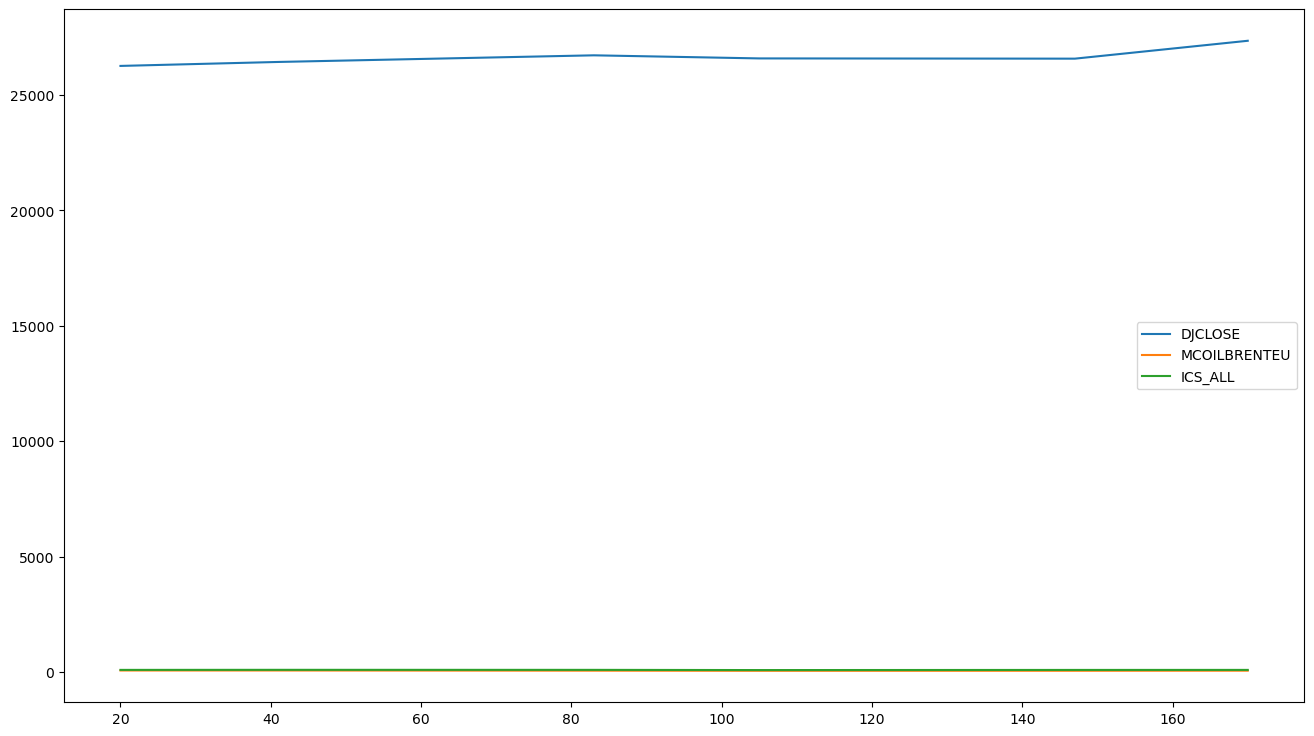

In [56]:
#
# Mehr Tricks mit plots https://pandas.pydata.org/pandas-docs/version/0.12/visualization.html
#
df.plot()

Text(0, 0.5, 'ICS_ALL')

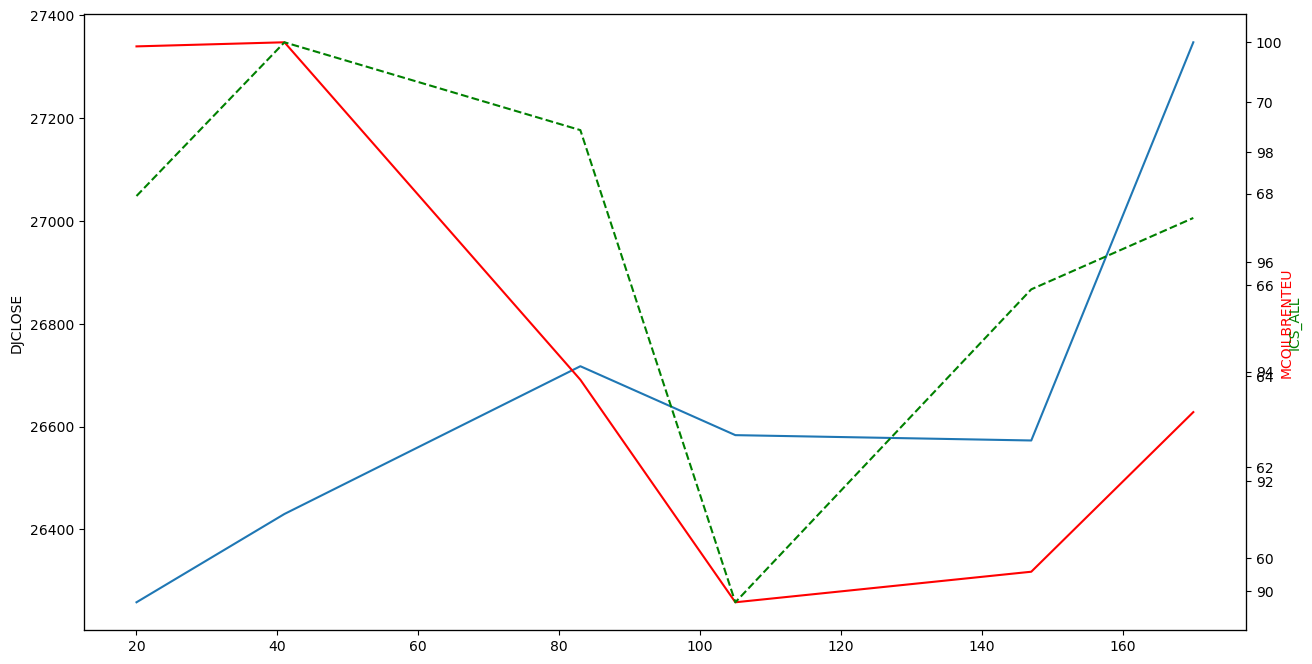

In [57]:
plt.rcParams["figure.figsize"] = (15,8)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df['DJCLOSE'])
ax1.set_ylabel('DJCLOSE')
ax2 = ax1.twinx()
ax2.plot(df['MCOILBRENTEU'], 'r-')
ax2.set_ylabel('MCOILBRENTEU', color='r')
ax3 = ax1.twinx()
ax3.plot(df['ICS_ALL'], 'g--')
ax3.set_ylabel('ICS_ALL', color='g')


In [58]:
#
# Datum als Index
#

df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

,DATE,DJCLOSE,MCOILBRENTEU,ICS_ALL
20,2019-04-01,26258.419922,71.23,97.2
41,2019-05-01,26430.140625,71.32,100.0
83,2019-07-01,26717.429688,63.92,98.4
105,2019-08-01,26583.419922,59.04,89.8
147,2019-10-01,26573.039063,59.71,95.5


In [59]:
df = df.set_index('DATE')

In [60]:
df.head()

,DJCLOSE,MCOILBRENTEU,ICS_ALL
DATE,,,
2019-04-01,26258.419922,71.23,97.2
2019-05-01,26430.140625,71.32,100.0
2019-07-01,26717.429688,63.92,98.4
2019-08-01,26583.419922,59.04,89.8
2019-10-01,26573.039063,59.71,95.5


Text(0, 0.5, 'ICS_ALL')

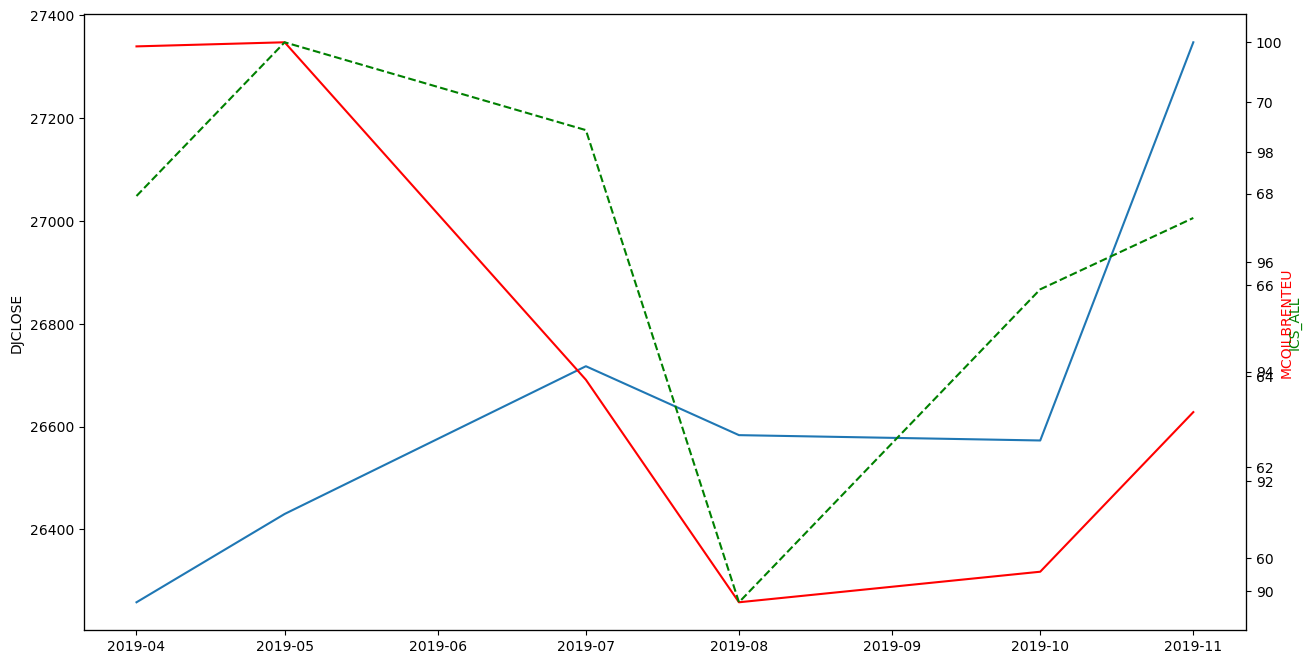

In [61]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df['DJCLOSE'])
ax1.set_ylabel('DJCLOSE')
ax2 = ax1.twinx()
ax2.plot(df['MCOILBRENTEU'], 'r-')
ax2.set_ylabel('MCOILBRENTEU', color='r')
ax3 = ax1.twinx()
ax3.plot(df['ICS_ALL'], 'g--')
ax3.set_ylabel('ICS_ALL', color='g')


# Weitere Besonderheiten von Zeitreihen

Zeitreihen erfordern die genaue Behandlung der Perioden. Ebenso kommt ein Aspekt dazu, der in anderen Daten oft nicht relevant ist. Ein Messpunkt zu einer Zeit kann sich auf die Vergangenheit oder auf die Zukunft beziehen. 


In [62]:
#
# Laden einer Zeitreihe
#

In [63]:
consumption = pd.read_csv('data/energy.csv')

In [64]:
consumption.head()

,;20160314000000;;402;W;0.0
0,;20160314000032;;402;W;0.0
1,;20160314000105;;406;W;0.0
2,;20160314000137;;406;W;0.0
3,;20160314000209;;390;W;0.0
4,;20160314000241;;333;W;0.0


In [65]:
consumption = pd.read_csv('data/energy.csv', header=None, usecols=[1,3], sep=';')

In [66]:
consumption.head()

,1,3
0,20160314000000,402
1,20160314000032,402
2,20160314000105,406
3,20160314000137,406
4,20160314000209,390


In [67]:
#
# Umbenennen der Spalten
#
consumption.columns = ['DATE','POWERW']
consumption.head()

,DATE,POWERW
0,20160314000000,402
1,20160314000032,402
2,20160314000105,406
3,20160314000137,406
4,20160314000209,390


## Umwandeln von Datumswerten

Details zu den Datumstrings https://www.journaldev.com/23365/python-string-to-datetime-strptime

<img src="info.png" align="left"/> 

In [68]:
#
# Umwandeln in korrektes Datumsformat
# 
consumption['DATE'] = consumption.apply(lambda x: datetime.datetime.strptime("{0}".format( x['DATE']), "%Y%m%d%H%M%S"),axis=1)

In [69]:
consumption.head()

,DATE,POWERW
0,2016-03-14 00:00:00,402
1,2016-03-14 00:00:32,402
2,2016-03-14 00:01:05,406
3,2016-03-14 00:01:37,406
4,2016-03-14 00:02:09,390


In [70]:
consumption = consumption.set_index('DATE')
consumption.head()

,POWERW
DATE,
2016-03-14 00:00:00,402
2016-03-14 00:00:32,402
2016-03-14 00:01:05,406
2016-03-14 00:01:37,406
2016-03-14 00:02:09,390


<Axes: xlabel='DATE'>

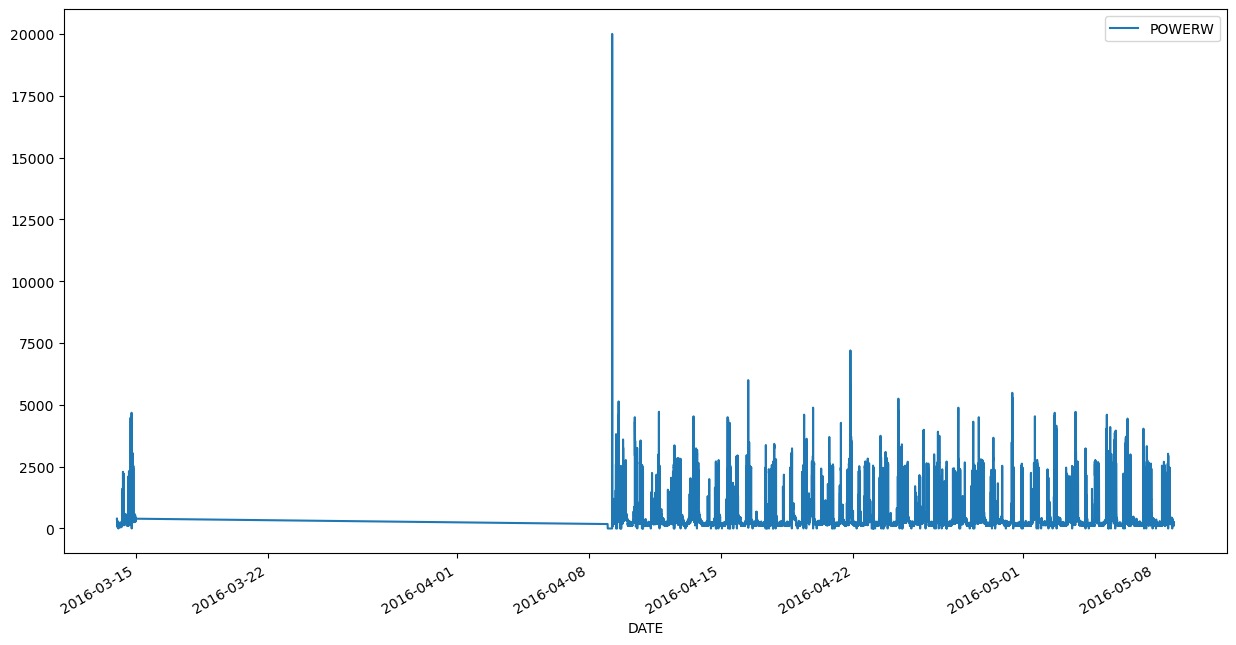

In [71]:
consumption.plot()

## Ausschneiden des nutzbaren Datenbereiches

In [72]:
consumption.loc['2016-03-22':]

,POWERW
DATE,
2016-04-09 00:00:23,180
2016-04-09 00:00:59,1
2016-04-09 00:01:35,1
2016-04-09 00:02:08,1
2016-04-09 00:02:40,1
...,...
2016-05-08 23:57:43,130
2016-05-08 23:58:16,116
2016-05-08 23:58:49,116


In [73]:
consumption = consumption.loc['2016-04-10':]

In [74]:
consumption.head()

,POWERW
DATE,
2016-04-10 00:00:24,560
2016-04-10 00:01:00,567
2016-04-10 00:01:37,570
2016-04-10 00:02:10,570
2016-04-10 00:02:42,567


## Resampling auf 1 Minuten Stützstellen

Mehr Information zur resampling Funktion kann zum Beispiel hier gefunden werden:
https://towardsdatascience.com/using-the-pandas-resample-function-a231144194c4

<img src="info.png" align="left"/> 

In [75]:
#
# Resampling erzeugt neue Stützpunkte im Minutentakt
# Die Mean Funktion ermittelt den neuen Wert als Mittelwert der vorherigen Werte
#
consumption = consumption.resample('1min').mean()

In [76]:
day = consumption.loc['2016-04-10 00:00:00':'2016-04-11 00:00:00']

In [77]:
day.tail()

,POWERW
DATE,
2016-04-10 23:56:00,137.5
2016-04-10 23:57:00,135.0
2016-04-10 23:58:00,136.0
2016-04-10 23:59:00,137.5
2016-04-11 00:00:00,139.0


<Axes: xlabel='DATE'>

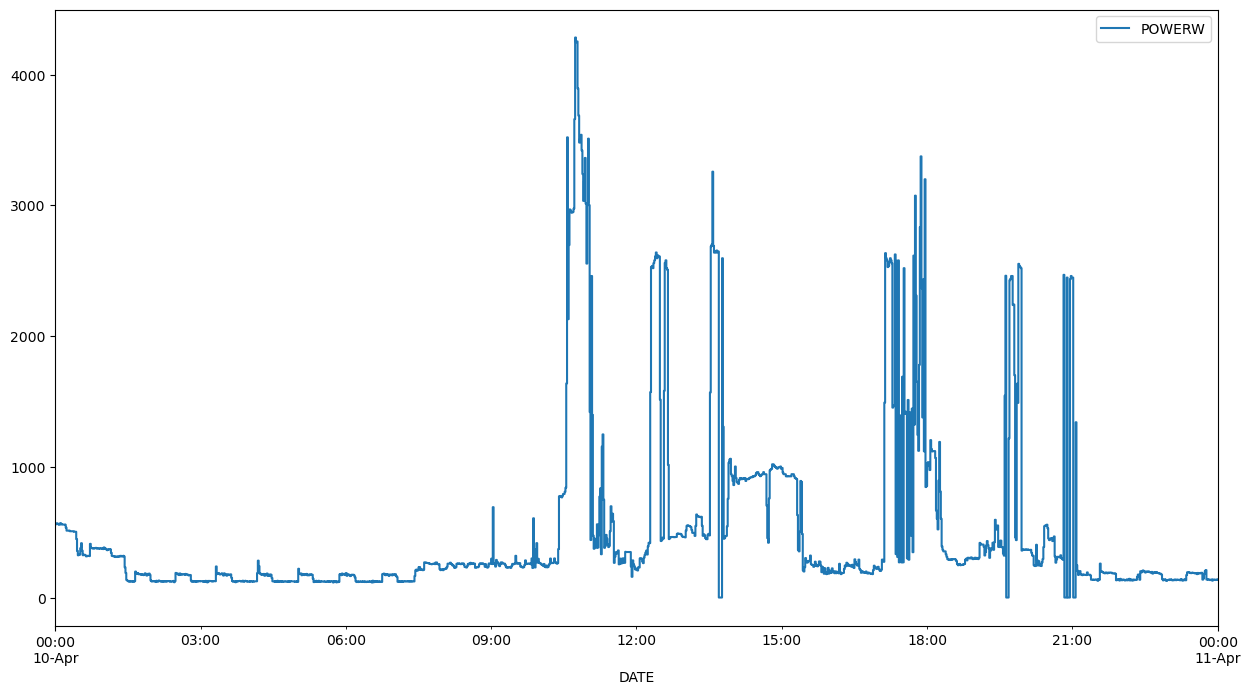

In [78]:
day.plot(drawstyle='steps-post')

In [79]:
day15 = day.resample('15min').mean()

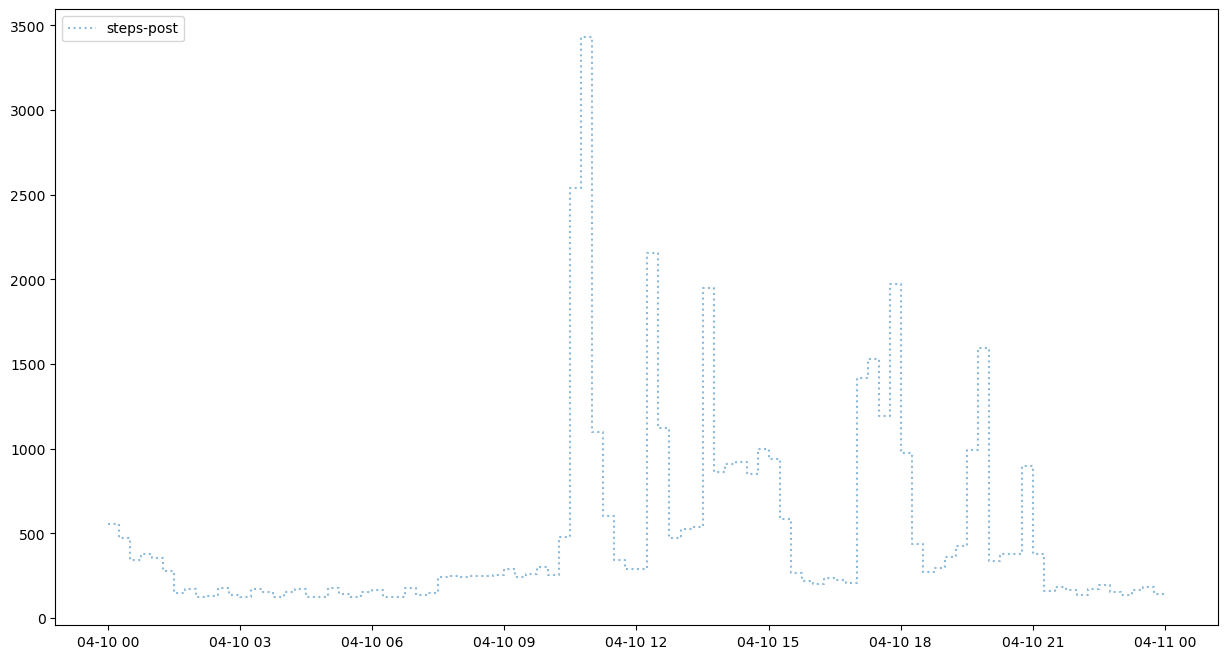

In [80]:
#plt.plot(day15, drawstyle='steps', linestyle='-', label='steps-pre aka steps', alpha=0.5,)
#plt.plot(day15, drawstyle='steps-mid', linestyle='--', label='steps-mid', alpha=0.5,)
plt.plot(day15, drawstyle='steps-post', linestyle=':', label='steps-post', alpha=0.5,)
plt.legend(loc='upper left')
plt.show()

Es ist sehr wichtig zu wissen, die die Daten in Relation zum Zeitpunkt zu verstehen sind. War der Wert **vor** dem Zeitpunkt gültig (steps-pre), oder startet der Wert zu diesem Zeitpunkt (steps-post), oder liegt der Zeitpunkt in der Mitte (steps-mid).

# Weitere Transformationen von Features und Labels

- one hot encoding
- embedding
- arithmetische Transformationen
- komplexe Transformationen

<img src="info.png" align="left"/> 
